### Step Function
- **Formula:**  
  f(x) = { 0 if x < 0, 1 if x ≥ 0 }  
- **Range:** {0, 1}  
- **Use:** Early perceptrons (binary thresholding).  
- **Issue:** Not differentiable at x=0, gradient is 0 elsewhere → not suitable for gradient-based learning.  

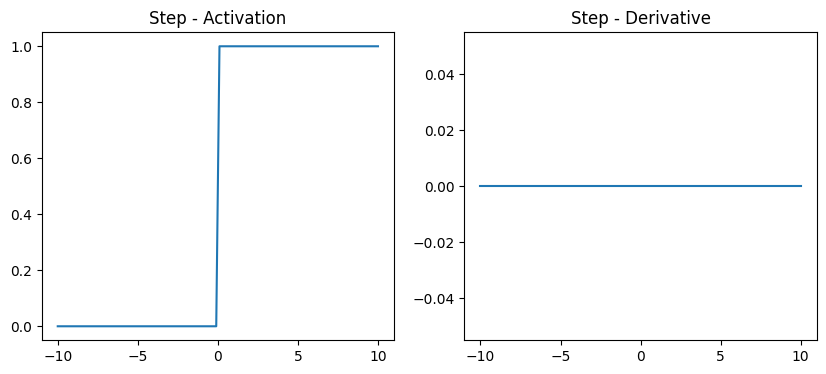

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def step(x):
    return np.where(x < 0, 0.0, 1.0)

def step_derivative(x):
    d = np.zeros_like(x, dtype=float)
    d[np.isclose(x, 0.0)] = np.nan  # undefined at 0
    return d

x = np.linspace(-10, 10, 100)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(x, step(x)); plt.title("Step - Activation")
plt.subplot(1,2,2); plt.plot(x, step_derivative(x)); plt.title("Step - Derivative")
plt.show()




### Sigmoid
- **Formula:**  
  f(x) = 1 / (1 + e^(-x))  
- **Range:** (0, 1)  
- **Use:** Binary classification, logistic regression.  
- **Advantage:** Smooth, outputs probabilities.  
- **Issue:** Vanishing gradients for large |x|, not zero-centered.  


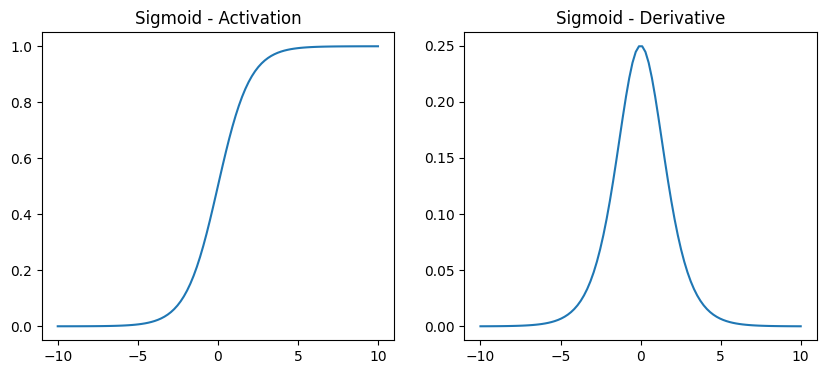

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(x, sigmoid(x)); plt.title("Sigmoid - Activation")
plt.subplot(1,2,2); plt.plot(x, sigmoid_derivative(x)); plt.title("Sigmoid - Derivative")
plt.show()


### ReLU (Rectified Linear Unit)
- **Formula:**  
  f(x) = max(0, x)  
- **Range:** [0, ∞)  
- **Use:** Most widely used in deep networks (hidden layers).  
- **Advantage:** Simple, efficient, reduces vanishing gradient issue.  
- **Issue:** “Dead neurons” — units stuck at 0 for all inputs.  


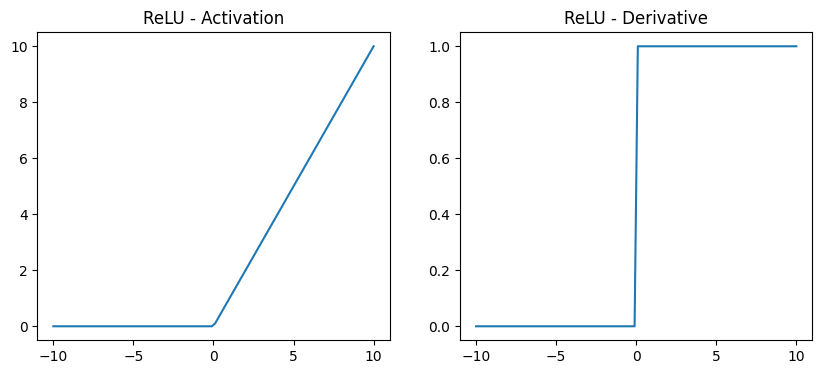

In [14]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    d = np.where(x > 0, 1.0, 0.0)
    d[np.isclose(x, 0.0)] = np.nan
    return d

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(x, relu(x)); plt.title("ReLU - Activation")
plt.subplot(1,2,2); plt.plot(x, relu_derivative(x)); plt.title("ReLU - Derivative")
plt.show()

### PReLU (Parametric ReLU)
- **Formula:**  
  f(x) = x if x > 0, αx if x ≤ 0 (α is learnable)  
- **Range:** (-∞, ∞)  
- **Use:** Improves flexibility by letting network learn the negative slope.  
- **Advantage:** Adaptive; can improve performance vs fixed Leaky ReLU.  


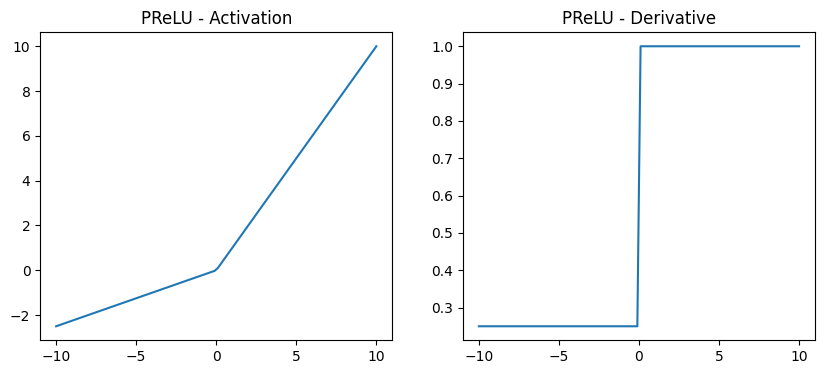

In [15]:
def prelu(x, alpha=0.25):
    return np.where(x > 0, x, alpha*x)

def prelu_derivative(x, alpha=0.25):
    d = np.where(x > 0, 1.0, alpha)
    d[np.isclose(x, 0.0)] = np.nan
    return d

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(x, prelu(x)); plt.title("PReLU - Activation")
plt.subplot(1,2,2); plt.plot(x, prelu_derivative(x)); plt.title("PReLU - Derivative")
plt.show()


### ELU (Exponential Linear Unit)
- **Formula:**  
  f(x) = x if x > 0, α(e^x – 1) if x ≤ 0  (α = 1.0 typically)  
- **Range:** (-α, ∞)  
- **Use:** Reduces bias shift by pushing mean activations closer to zero.  
- **Advantage:** Smooth negative part compared to ReLU.  


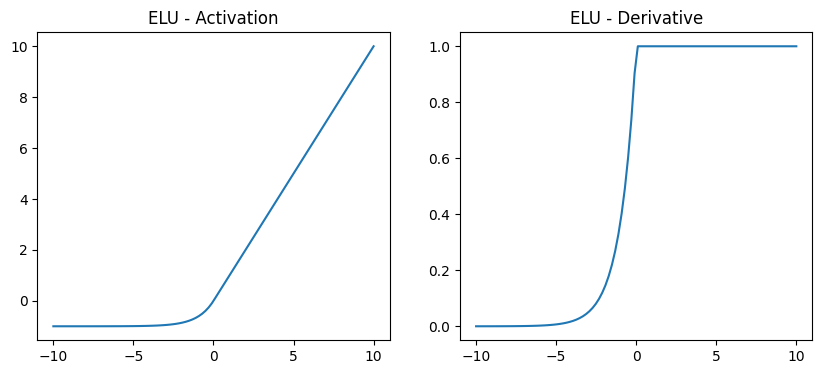

In [16]:
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha*(np.exp(x)-1))

def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1.0, alpha*np.exp(x))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(x, elu(x)); plt.title("ELU - Activation")
plt.subplot(1,2,2); plt.plot(x, elu_derivative(x)); plt.title("ELU - Derivative")
plt.show()

### Swish
- **Formula:**  
  f(x) = x * sigmoid(x)  
- **Range:** (-∞, ∞)  
- **Use:** Modern deep learning models (Google’s research).  
- **Advantage:** Smooth, non-monotonic; often performs better than ReLU.  


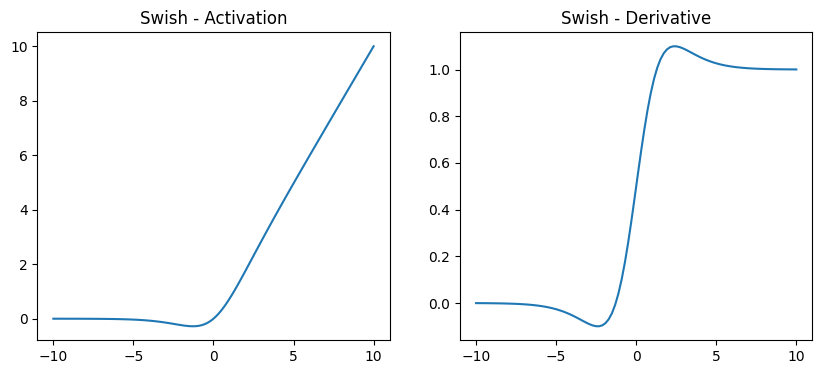

In [17]:
def swish(x):
    s = sigmoid(x)
    return x * s

def swish_derivative(x):
    s = sigmoid(x)
    return s + x*s*(1-s)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(x, swish(x)); plt.title("Swish - Activation")
plt.subplot(1,2,2); plt.plot(x, swish_derivative(x)); plt.title("Swish - Derivative")
plt.show()




### Linear (Identity)
- **Formula:**  
  f(x) = x  
- **Range:** (-∞, ∞)  
- **Use:** Output layer in regression tasks.  
- **Advantage:** No transformation, keeps data linear.  
- **Issue:** No non-linearity → not useful for hidden layers.  


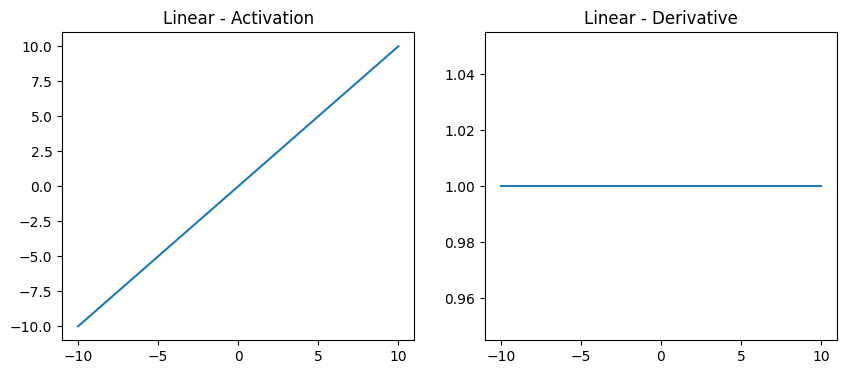

In [18]:
def linear(x):
    return x

def linear_derivative(x):
    return np.ones_like(x)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(x, linear(x)); plt.title("Linear - Activation")
plt.subplot(1,2,2); plt.plot(x, linear_derivative(x)); plt.title("Linear - Derivative")
plt.show()

### Softmax
- **Formula:**  
  f(x_i) = e^(x_i) / Σ e^(x_j)  
- **Range:** (0, 1), and Σ f(x_i) = 1  
- **Use:** Output layer for multi-class classification.  
- **Advantage:** Converts logits into probability distribution.  
- **Note:** Derivative is a Jacobian matrix; we visualize diagonal s_i(1 - s_i).  


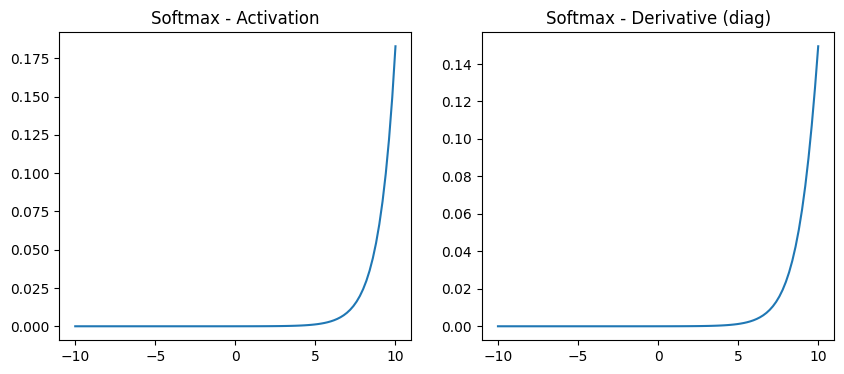

In [19]:
def softmax(x):
    z = x - np.max(x)
    ez = np.exp(z)
    return ez / np.sum(ez)

def softmax_diag_derivative(x):
    s = softmax(x)
    return s * (1-s)   # diagonal of Jacobian

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(x, softmax(x)); plt.title("Softmax - Activation")
plt.subplot(1,2,2); plt.plot(x, softmax_diag_derivative(x)); plt.title("Softmax - Derivative (diag)")
plt.show()

### Tanh (Hyperbolic Tangent)
- **Formula:**  
  f(x) = (e^x – e^(-x)) / (e^x + e^(-x))  
- **Range:** (-1, 1)  
- **Use:** Neural nets before ReLU became standard.  
- **Advantage:** Zero-centered, better than sigmoid for hidden layers.  
- **Issue:** Still suffers from vanishing gradients at large |x|.  


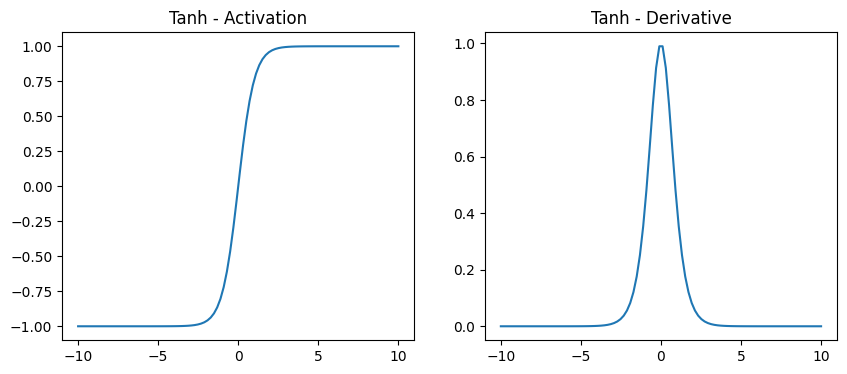

In [20]:
def tanh_fn(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(x, tanh_fn(x)); plt.title("Tanh - Activation")
plt.subplot(1,2,2); plt.plot(x, tanh_derivative(x)); plt.title("Tanh - Derivative")
plt.show()

